In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
#Create a data frame
df = pd.read_csv('supermarket_sales - Sheet1.csv')

# Task 1: Initial Data Exploration

In [121]:
#Convert Date type to data time object
df['Date'] = pd.to_datetime(df['Date'])

In [122]:
#Check all variables
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,983.000000,992.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.611740,5.509073,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.556033,2.915548,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.665000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,54.860000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,78.010000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'cogs'}>],
       [<AxesSubplot:title={'center':'gross margin percentage'}>,
        <AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>]], dtype=object)

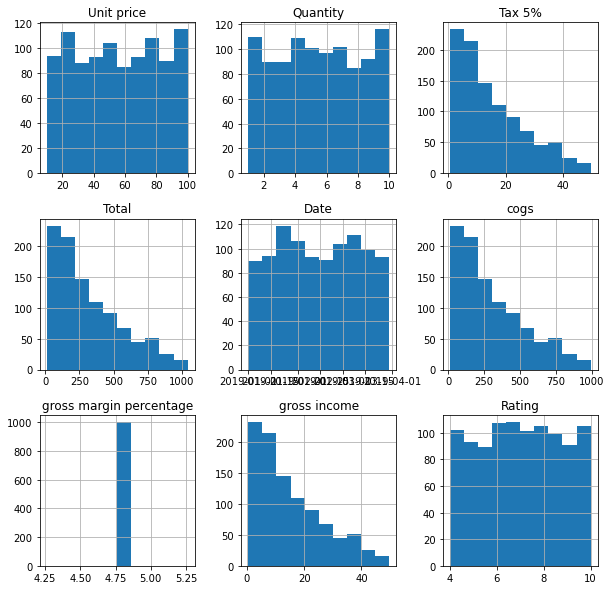

In [123]:
##Plot all variables

df.hist(figsize=(10,10))

# Task 2: Univariate Analysis

C:\Users\296333\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


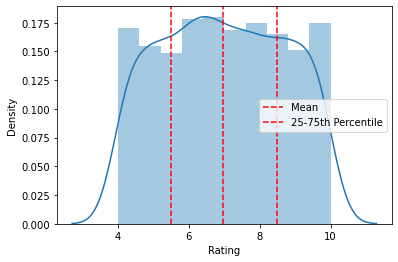

In [124]:
##Question 1: What does the distribution of customer ratings looks like? Is it skewed?

sns.distplot(df['Rating'])
plt.axvline(np.mean(df['Rating']),c='red',ls='--',label='Mean')
plt.axvline(np.percentile(df['Rating'],25),c='red',ls='--',label='25-75th Percentile')
plt.axvline(np.percentile(df['Rating'],75),c='red',ls='--')
plt.legend()

A    340
B    332
C    328
Name: Branch, dtype: int64


C:\Users\296333\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='count'>

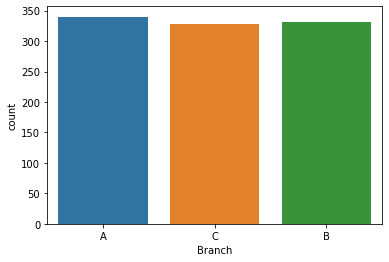

In [125]:
##Question 2: Do aggregate sales numbers differ by much between branches?

print(df['Branch'].value_counts())

sns.countplot(df['Branch'])

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


C:\Users\296333\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


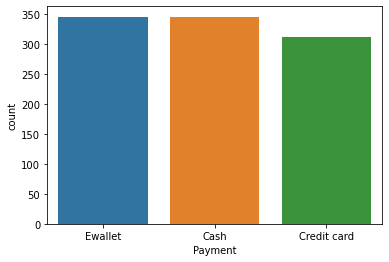

In [126]:
sns.countplot(df['Payment'])
print(df['Payment'].value_counts())

# Task 2: Univariate Analysis

Question 3: Is there a relationship between gross income and customer ratings?

In [160]:
round(np.corrcoef(df['gross income'],df['Rating'])[0,1],3)

-0.036

In [128]:
mean_x = np.mean(df['gross income'])
mean_y = np.mean(df['Rating'])
std_x = np.std(df['gross income'])
std_y = np.std(df['Rating'])

s = [(x,y) for x,y in zip(df['gross income'],df['Rating'])]
t = [(x-mean_x) * (y-mean_y) for x,y in s]

num = 1

for i in t:
    num *= i
    
j = std_x * std_y

print(num/j)

-inf


C:\Users\296333\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross income', ylabel='Rating'>

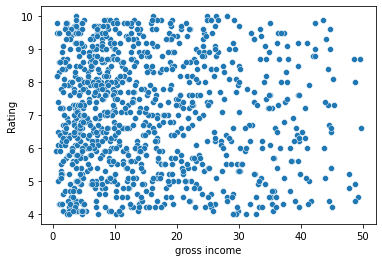

In [129]:
sns.scatterplot(df['gross income'],df['Rating'])

C:\Users\296333\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Branch', ylabel='gross income'>

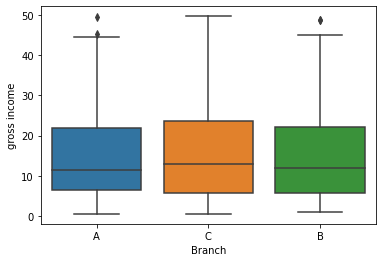

In [130]:
sns.boxplot(df['Branch'],df['gross income'])

C:\Users\296333\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Unit price'>

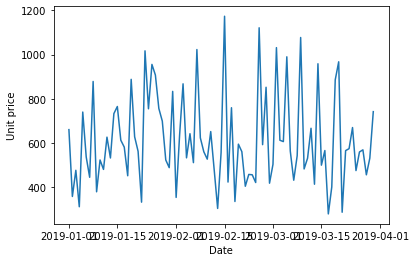

In [131]:
sns.lineplot(df.groupby(df['Date']).sum().index,df.groupby(df['Date']).sum()['Unit price'])

# Task 4: Dealing With Duplicate Rows and Missing Values

In [132]:
df.duplicated().sum()

0

In [133]:
df.drop_duplicates(inplace=True)

In [153]:
df.isna().sum()/len(df)

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

<AxesSubplot:>

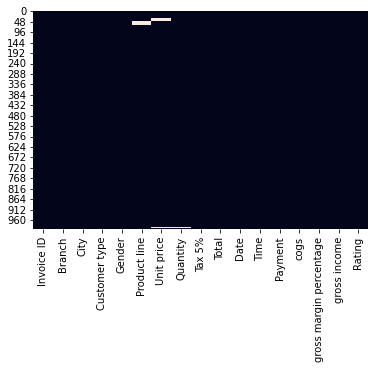

In [139]:
sns.heatmap(df.isna(),cbar=False)

In [142]:
df.fillna(df.mean(),inplace=True)

C:\Users\296333\AppData\Local\Temp/ipykernel_16888/2085774198.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(),inplace=True)
C:\Users\296333\AppData\Local\Temp/ipykernel_16888/2085774198.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


In [152]:
df.fillna(df.mode().iloc[0],inplace=True)

In [151]:
df.mode().iloc[0]

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Member
Gender                                  Female
Product line               Fashion accessories
Unit price                            55.61174
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Date                       2019-02-07 00:00:00
Time                                     14:42
Payment                                Ewallet
cogs                                     83.08
gross margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Name: 0, dtype: object

df2 = pd.read_csv('supermarket_sales - Sheet1.csv')
prof = ProfileReport(df2)
prof

# Task5: Correlation Analysis

In [162]:
np.round(df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.02,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.02,1.00,0.70,0.70,0.70,NaN,0.70,-0.02
Tax 5%,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


<AxesSubplot:>

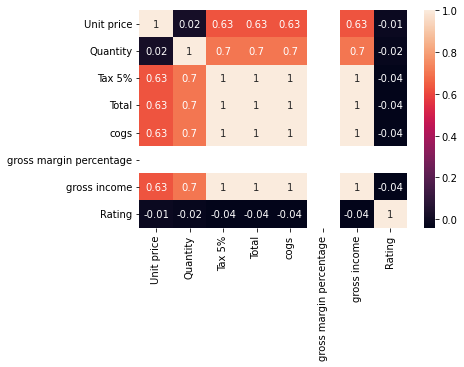

In [165]:
sns.heatmap(np.round(df.corr(),2),annot=True)